c:\Users\joaqu\miniconda3\envs\tfg2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO - 2025-02-21T12:18:08Z - Selected dataset version: "202411"
INFO - 2025-02-21T12:18:08Z - Selected dataset part: "default"


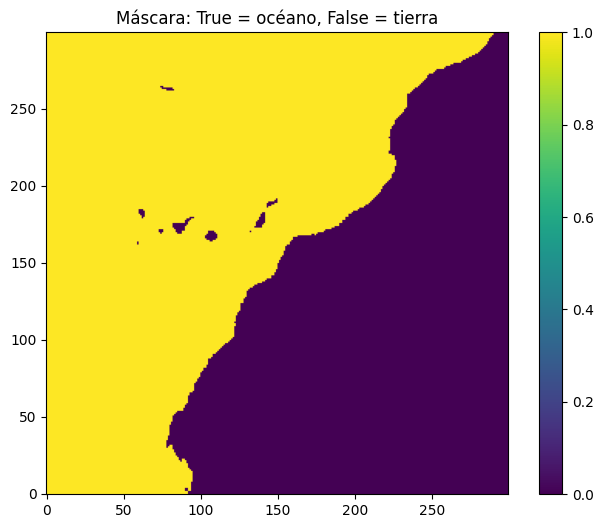

In [4]:
import copernicusmarine as cm
import numpy as np
import matplotlib.pyplot as plt

# Descarga de un día de datos SST del nuevo producto
ds = cm.open_dataset(
    dataset_id="cmems-IFREMER-ATL-SST-L4-REP-OBS_FULL_TIME_SERIE",
    variables=["analysed_sst"],
    minimum_longitude=-20.97,
    maximum_longitude=-5.975,
    minimum_latitude=19.55,
    maximum_latitude=34.525,
    start_datetime="2023-12-30T00:00:00",
    end_datetime="2023-12-31T00:00:00",
)

sst = ds["analysed_sst"].values

# Usar la primera imagen temporal para crear la máscara:
mask = ~np.isnan(sst[0])

# Mostrar la máscara
plt.figure(figsize=(8, 6))
plt.imshow(mask, origin='lower', cmap='viridis')
plt.title("Máscara: True = océano, False = tierra")
plt.colorbar()
plt.show()


INFO - 2025-02-21T12:18:18Z - Selected dataset version: "202411"
INFO - 2025-02-21T12:18:18Z - Selected dataset part: "default"


Máscara guardada en d:\aiisgroup\Seacast\data\atlantic\static\bathy_mask.nc


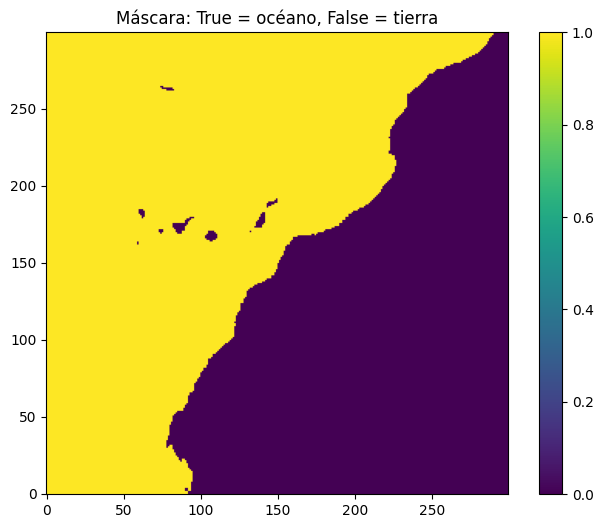

In [5]:
import os
import xarray as xr
import copernicusmarine as cm
import numpy as np
import matplotlib.pyplot as plt

def create_sst_mask(static_dir, 
                    start_datetime="2023-12-30T00:00:00", 
                    end_datetime="2023-12-31T00:00:00"):
    """
    Descarga datos SST de un día, crea la máscara (True=océano, False=tierra)
    y la guarda como NetCDF en el directorio static.
    """
    ds = cm.open_dataset(
        dataset_id="cmems-IFREMER-ATL-SST-L4-REP-OBS_FULL_TIME_SERIE",
        variables=["analysed_sst"],
        minimum_longitude=-20.97,
        maximum_longitude=-5.975,
        minimum_latitude=19.55,
        maximum_latitude=34.525,
        start_datetime=start_datetime,
        end_datetime=end_datetime,
    )
    sst = ds["analysed_sst"]
    mask = xr.where(np.isnan(sst.isel(time=0)), 0, 1)
    mask.name = "mask"

    out_path = os.path.join(static_dir, "bathy_mask.nc")
    mask.to_netcdf(out_path)
    print(f"Máscara guardada en {out_path}")
    return mask

# Uso:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
static_dir = os.path.join(BASE_DIR, "data", "atlantic", "static")
os.makedirs(static_dir, exist_ok=True)
mask = create_sst_mask(static_dir)

# Visualización
plt.figure(figsize=(8, 6))
plt.imshow(mask.values, origin='lower', cmap='viridis')
plt.title("Máscara: True = océano, False = tierra")
plt.colorbar()
plt.show()


In [6]:
mask

<xarray.DataArray 'mask' (latitude: 300, longitude: 300)> Size: 360kB
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])
Coordinates:
  * latitude   (latitude) float64 2kB 19.57 19.62 19.68 ... 34.42 34.48 34.52
  * longitude  (longitude) float64 2kB -20.93 -20.88 -20.82 ... -6.025 -5.975
    time       datetime64[ns] 8B 2023-12-30

In [7]:
import xarray as xr
import os

# Cargar la máscara batimétrica (bathy_mask.nc)
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
dir = os.path.join(BASE_DIR, "data", "mediterranean", "static", "bathy_mask.nc")
mask_ds = xr.load_dataset(dir)
print(mask_ds)
mask = mask_ds.mask
mask

<xarray.Dataset> Size: 7MB
Dimensions:    (depth: 18, latitude: 380, longitude: 1016)
Coordinates:
  * depth      (depth) float32 72B 1.018 5.465 10.54 16.27 ... 153.4 172.2 192.5
  * latitude   (latitude) float32 2kB 30.19 30.23 30.27 ... 45.9 45.94 45.98
  * longitude  (longitude) float32 4kB -6.0 -5.958 -5.917 ... 36.21 36.25 36.29
Data variables:
    mask       (depth, latitude, longitude) int8 7MB 0 0 0 0 0 0 ... 0 0 0 0 0 0


<xarray.DataArray 'mask' (depth: 18, latitude: 380, longitude: 1016)> Size: 7MB
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=int8)
Coordinates:
  * depth      (depth) float32 72B 1.018 5.465 10.54 16.27 ... 153.4 172.2 192.5
  * latitude   (latitude) float32 2kB 30.19 30.23 30.27 ... 45.9 45.94 45.98
  * longitude  (longitude) float32 4kB -6.0 -5.958 -5.917 ... 36.21 36.25 36.29
Attributes:
    long_name:      Land-sea mask: 1 = sea ; 0 = land
    standard_name:  sea_binary_mask
    units:          1

In [8]:
import xarray as xr
import os

# Cargar la máscara batimétrica (bathy_mask.nc) del atlántico
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
mask_path = os.path.join(BASE_DIR, "data", "atlantic", "static", "bathy_mask.nc")
mask_ds = xr.load_dataset(mask_path)
#print(mask_ds)

# Extraer la variable 'mask' y asegurarse de que sea 2D (latitude, longitude)
mask = mask_ds.mask.squeeze()

# Eliminar la coordenada 'time' si existe
if "time" in mask.coords:
    mask = mask.drop_vars("time")

# Expandir la variable para agregar la dimensión 'depth'
mask_2d = mask  # ya es 2D
mask_3d = mask_2d.expand_dims("depth")
mask_3d = mask_3d.assign_coords(depth=[0])
mask_3d = mask_3d.transpose("depth", "latitude", "longitude")

# Crear un nuevo DataArray con dims y coordenadas en el orden deseado
mask_final = xr.DataArray(
    mask_3d.data,
    dims=("depth", "latitude", "longitude"),
    coords={
        "depth": mask_3d.depth,
        "latitude": mask_3d.latitude,
        "longitude": mask_3d.longitude,
    }
)

print(mask_final)
mask_final

<xarray.DataArray (depth: 1, latitude: 300, longitude: 300)> Size: 360kB
array([[[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]])
Coordinates:
  * depth      (depth) int32 4B 0
  * latitude   (latitude) float64 2kB 19.57 19.62 19.68 ... 34.42 34.48 34.52
  * longitude  (longitude) float64 2kB -20.93 -20.88 -20.82 ... -6.025 -5.975


<xarray.DataArray (depth: 1, latitude: 300, longitude: 300)> Size: 360kB
array([[[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]])
Coordinates:
  * depth      (depth) int32 4B 0
  * latitude   (latitude) float64 2kB 19.57 19.62 19.68 ... 34.42 34.48 34.52
  * longitude  (longitude) float64 2kB -20.93 -20.88 -20.82 ... -6.025 -5.975

In [9]:
import xarray as xr
import os
import numpy as np

# Cargar la máscara batimétrica (bathy_mask.nc)
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
dir = os.path.join(BASE_DIR, "data", "atlantic", "static", "sea_mask.npy")
sea_mask = np.load(dir)
print("sea_mask shape:", sea_mask.shape)
print(sea_mask)
sea_mask

sea_mask shape: (1, 300, 300)
[[[ True  True  True ... False False False]
  [ True  True  True ... False False False]
  [ True  True  True ... False False False]
  ...
  [ True  True  True ... False False False]
  [ True  True  True ... False False False]
  [ True  True  True ... False False False]]]


array([[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]]])

In [10]:
grid_mask = sea_mask.astype(bool)

n_grid_expected = np.sum(grid_mask)
print("n_grid expected: ", n_grid_expected)

n_grid expected:  49061


In [11]:
import xarray as xr
import os
import numpy as np

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
dir = os.path.join(BASE_DIR, "data", "atlantic", "raw", "reanalysis", "20180101.npy")
sample = np.load(dir)
print("shape:", sample.shape)
print(sample)
sample

shape: (49061, 1)
[[295.16]
 [295.16]
 [295.16]
 ...
 [289.3 ]
 [289.21]
 [289.26]]


array([[295.16],
       [295.16],
       [295.16],
       ...,
       [289.3 ],
       [289.21],
       [289.26]])

In [12]:
import xarray as xr
import os
import numpy as np

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
dir = os.path.join(BASE_DIR, "data", "mediterranean", "raw", "reanalysis", "20180101.npy")
sample = np.load(dir)
print("shape:", sample.shape)
print(sample)
sample

shape: (144990, 75)
[[ 5.1613753e-03  2.9637318e-03  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  1.7182936e+01]
 [ 3.7301215e-03  1.7228795e-03  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  1.7326532e+01]
 [ 5.4106547e-04 -3.8447119e-03 -8.4886122e-03 ...  0.0000000e+00
   0.0000000e+00  1.7535408e+01]
 ...
 [ 1.5301394e-02 -2.4317335e-02  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  1.1129252e+01]
 [-6.2275203e-03 -2.7188421e-03  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  1.1020514e+01]
 [-1.3833763e-02  8.4502874e-03  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  1.0936413e+01]]


array([[ 5.1613753e-03,  2.9637318e-03,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  1.7182936e+01],
       [ 3.7301215e-03,  1.7228795e-03,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  1.7326532e+01],
       [ 5.4106547e-04, -3.8447119e-03, -8.4886122e-03, ...,
         0.0000000e+00,  0.0000000e+00,  1.7535408e+01],
       ...,
       [ 1.5301394e-02, -2.4317335e-02,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  1.1129252e+01],
       [-6.2275203e-03, -2.7188421e-03,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  1.1020514e+01],
       [-1.3833763e-02,  8.4502874e-03,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  1.0936413e+01]], dtype=float32)

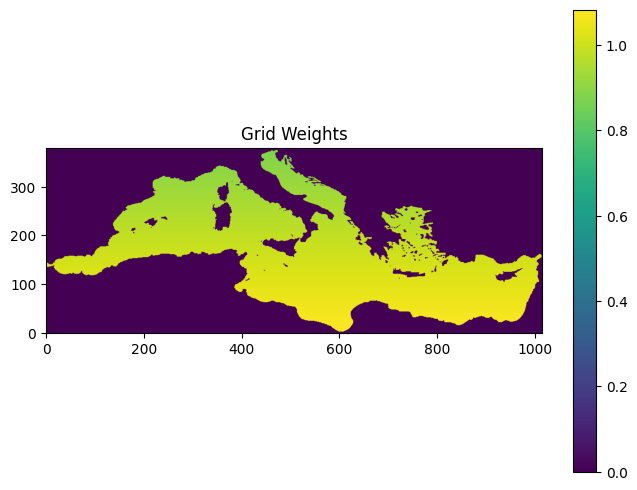

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
dir = os.path.join(BASE_DIR, "data", "mediterranean", "static", "grid_weights.npy")

# Cargar grid_weights.npy
grid_weights = np.load(dir)

plt.figure(figsize=(8,6))
plt.imshow(grid_weights, origin="lower", cmap="viridis")
plt.colorbar()
plt.title("Grid Weights")
plt.show()


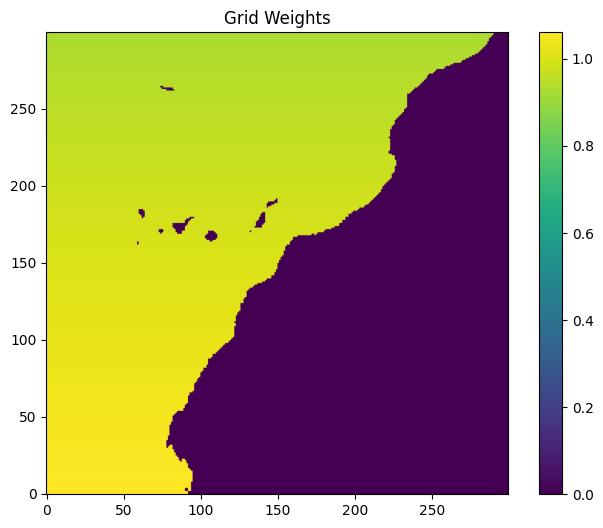

Mean grid weight over sea nodes: 0.9848944357628896


In [14]:
import numpy as np
import matplotlib.pyplot as plt

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
dir = os.path.join(BASE_DIR, "data", "atlantic", "static", "grid_weights.npy")

# Cargar grid_weights.npy
grid_weights = np.load(dir)

plt.figure(figsize=(8,6))
plt.imshow(grid_weights, origin="lower", cmap="viridis")
plt.colorbar()
plt.title("Grid Weights")
plt.show()

dir = os.path.join(BASE_DIR, "data", "atlantic", "static", "sea_mask.npy")
sea_mask = np.load(dir)
sea_mask_arr = sea_mask[0].astype(float)

# Imprime para comprobación (opcional)
mean_weight = grid_weights[sea_mask_arr==1].mean()
print("Mean grid weight over sea nodes:", mean_weight)


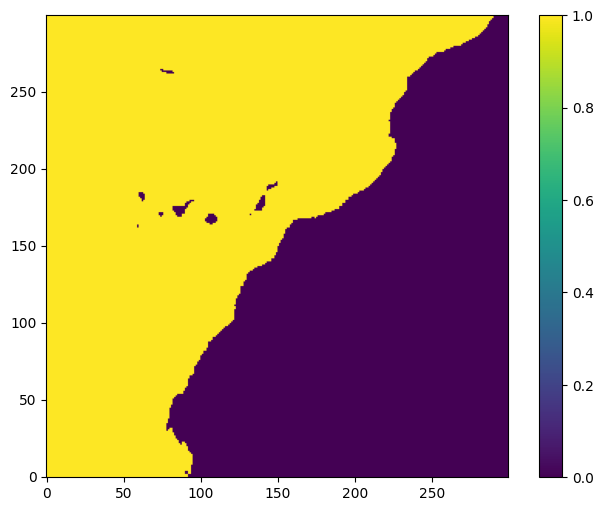

In [15]:
import numpy as np
import matplotlib.pyplot as plt

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
dir = os.path.join(BASE_DIR, "data", "atlantic", "static", "sea_mask.npy")

sea_mask = np.load(dir)

plt.figure(figsize=(8,6))
plt.imshow(sea_mask[0], origin="lower", cmap="viridis")
plt.colorbar()
plt.show()

In [16]:
import numpy as np

# Cargar grid_weights
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
dir = os.path.join(BASE_DIR, "data", "mediterranean", "static", "grid_weights.npy")

grid_weights = np.load(dir)

# La media de grid_weights debería ser 1 (o muy cercano a 1)
print("Media de grid_weights:", grid_weights.mean())

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
dir = os.path.join(BASE_DIR, "data", "mediterranean", "static", "coordinates.npy")

coords = np.load(dir)
lat = coords[0, :, 0]  # vector de latitudes
lon = coords[1, 0, :]  # vector de longitudes

# Calcular L(j) para cada latitud:
L = np.cos(lat * np.pi/180.0)
L_norm = L / L.mean()

L2D = np.tile(L_norm[:, np.newaxis], (1, len(lon)))
print("Media de L2D:", L2D.mean())

Media de grid_weights: 0.37554386
Media de L2D: 1.0000001


In [17]:
import numpy as np

# Cargar grid_weights
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
dir = os.path.join(BASE_DIR, "data", "mediterranean", "static", "grid_weights.npy")

grid_weights = np.load(dir)

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
dir = os.path.join(BASE_DIR, "data", "mediterranean", "static", "sea_mask.npy")

sea_mask = np.load(dir)
if sea_mask.ndim == 3:
    sea_mask = sea_mask[0]

total_nodes = np.sum(sea_mask)
print("Total sea nodes:", total_nodes)

normalized_weights = grid_weights / np.sum(grid_weights)
print("Suma de normalized_weights:", normalized_weights.sum())


Total sea nodes: 144990
Suma de normalized_weights: 1.0000002


In [18]:
import numpy as np
import os

# Cargar grid_weights.npy
path_grid_weights = os.path.join(BASE_DIR, "data", "mediterranean", "static", "grid_weights.npy")
grid_weights = np.load(path_grid_weights)

path_sea_mask = os.path.join(BASE_DIR, "data", "mediterranean", "static", "sea_mask.npy")
sea_mask = np.load(path_sea_mask)
sea_mask = sea_mask[0]

total_nodes = np.sum(sea_mask)
print("Total sea nodes:", total_nodes)

mean_weight = np.sum(grid_weights) / total_nodes
print("Mean grid weight over sea nodes:", mean_weight)


Total sea nodes: 144990
Mean grid weight over sea nodes: 0.9999997844678944


In [19]:
import numpy as np

def compute_grid_weights_from_cos(lat, lon):
    lat = np.asarray(lat)
    # Calcula coseno para cada latitud (en radianes)
    cos_lat = np.cos(lat * np.pi/180.0)
    # Normaliza dividiendo por la media de los cosenos
    L = cos_lat / cos_lat.mean()
    # Expande a 2D: cada fila (latitud) se repite en todas las longitudes
    grid_weights = np.tile(L[:, np.newaxis], (1, len(lon)))
    return grid_weights

# Ejemplo de uso:
lat = np.linspace(30.19, 45.98, 380)
lon = np.linspace(-6.0, 36.29, 1016)
gw = compute_grid_weights_from_cos(lat, lon)
print("Media de grid weights:", gw.mean())


Media de grid weights: 0.9999999999999999


In [20]:
import numpy as np
import os

def compute_grid_weights_from_cos(lat, lon, sea_mask):
    """
    Calcula grid weights usando la fórmula:
      L(j) = cos(lat(j)) / mean(cos(lat))
    para cada latitud, y luego multiplica por la sea mask para dejar 0 en tierra.
    
    Args:
        lat: array 1D de latitudes (en grados).
        lon: array 1D de longitudes.
        sea_mask: array 2D (shape: (Nlat, Nlon)) con 1 para mar y 0 para tierra.
        
    Returns:
        grid_weights: array 2D de forma (Nlat, Nlon) con los pesos finales.
    """
    lat = np.asarray(lat)
    # Calcular el coseno de cada latitud
    cos_lat = np.cos(lat * np.pi/180.0)
    # Normalizar dividiendo por la media de todos los cosenos
    L = cos_lat / cos_lat.mean()
    # Expandir a 2D: cada fila tendrá el valor correspondiente a esa latitud
    grid_weights = np.tile(L[:, np.newaxis], (1, len(lon)))
    # Aplicar la sea mask: en tierra (mask=0) los pesos serán 0
    grid_weights_final = grid_weights * sea_mask
    return grid_weights_final

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Ejemplo de uso:
dir = os.path.join(BASE_DIR, "data", "mediterranean", "static", "coordinates.npy")
coords = np.load(dir)
lat = coords[0, :, 0]  # vector de latitudes
lon = coords[1, 0, :]  # vector de longitudes

dir = os.path.join(BASE_DIR, "data", "mediterranean", "static", "sea_mask.npy")
sea_mask = np.load(dir)
if sea_mask.ndim == 3:
    sea_mask = sea_mask[0]

grid_weights = compute_grid_weights_from_cos(lat, lon, sea_mask)
print("Media de grid weights (mar):", grid_weights[sea_mask==1].mean())


Media de grid weights (mar): 1.0159781


In [21]:
import numpy as np
import os

def compute_grid_weights_from_cos(lat, lon, sea_mask):
    """
    Calcula grid weights usando la fórmula:
      L(j) = cos(lat(j)) / mean(cos(lat))
    para cada latitud, y luego multiplica por la sea mask para dejar 0 en tierra.
    
    Args:
        lat: array 1D de latitudes (en grados).
        lon: array 1D de longitudes.
        sea_mask: array 2D (shape: (Nlat, Nlon)) con 1 para mar y 0 para tierra.
        
    Returns:
        grid_weights: array 2D de forma (Nlat, Nlon) con los pesos finales.
    """
    lat = np.asarray(lat)
    # Calcular el coseno de cada latitud
    cos_lat = np.cos(lat * np.pi/180.0)
    # Normalizar dividiendo por la media de todos los cosenos
    L = cos_lat / cos_lat.mean()
    # Expandir a 2D: cada fila tendrá el valor correspondiente a esa latitud
    grid_weights = np.tile(L[:, np.newaxis], (1, len(lon)))
    # Aplicar la sea mask: en tierra (mask=0) los pesos serán 0
    grid_weights_final = grid_weights * sea_mask
    return grid_weights_final

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Ejemplo de uso:
dir = os.path.join(BASE_DIR, "data", "atlantic", "static", "coordinates.npy")
coords = np.load(dir)
lat = coords[0, :, 0]  # vector de latitudes
lon = coords[1, 0, :]  # vector de longitudes

dir = os.path.join(BASE_DIR, "data", "atlantic", "static", "sea_mask.npy")
sea_mask = np.load(dir)
if sea_mask.ndim == 3:
    sea_mask = sea_mask[0]

grid_weights = compute_grid_weights_from_cos(lat, lon, sea_mask)
print("Media de grid weights (mar):", grid_weights[sea_mask==1].mean())


Media de grid weights (mar): 0.9848944357628896


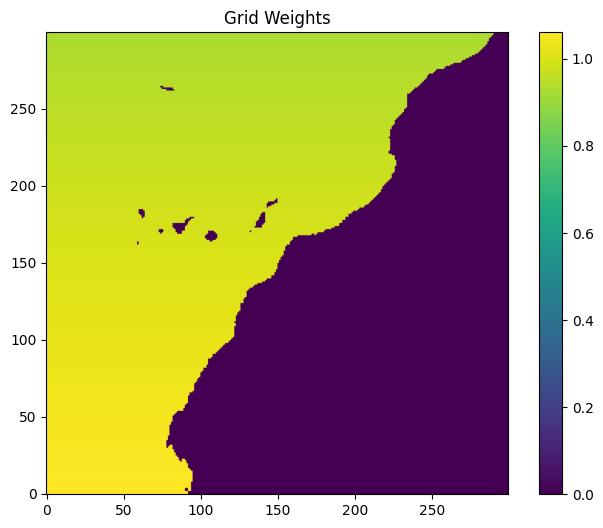

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.imshow(grid_weights, origin="lower", cmap="viridis")
plt.colorbar()
plt.title("Grid Weights")
plt.show()

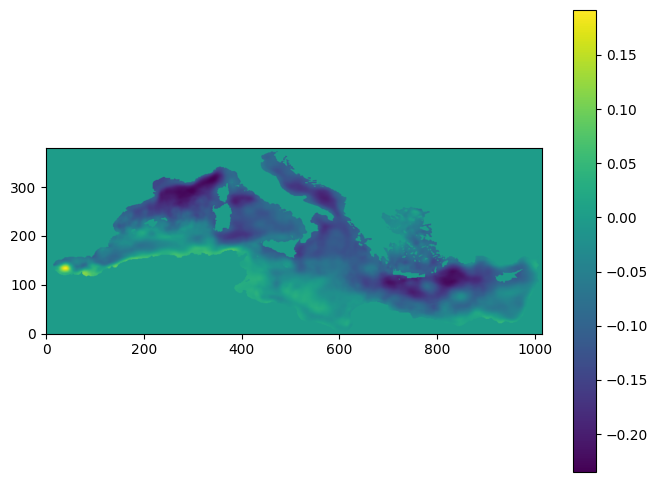

In [23]:
path_sea_topography = os.path.join(BASE_DIR, "data", "mediterranean", "static", "sea_topography.npy")
sea_topography = np.load(path_sea_topography)

plt.figure(figsize=(8,6))
plt.imshow(sea_topography, origin="lower", cmap="viridis")
plt.colorbar()
plt.show()

In [24]:
print("sea_topography shape:", sea_topography.shape)
print(sea_topography)

sea_topography shape: (380, 1016)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


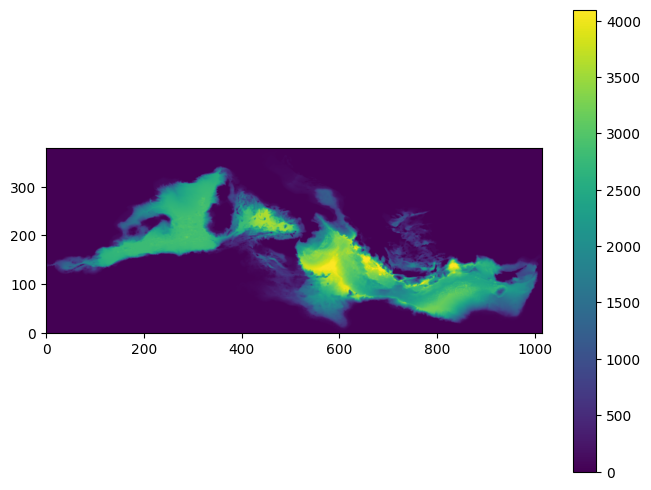

In [25]:
path_sea_depth = os.path.join(BASE_DIR, "data", "mediterranean", "static", "sea_depth.npy")
sea_depth = np.load(path_sea_depth)

plt.figure(figsize=(8,6))
plt.imshow(sea_depth, origin="lower", cmap="viridis")
plt.colorbar()
plt.show()

In [26]:
path_coords = os.path.join(BASE_DIR, "data", "atlantic", "static", "coordinates.npy")
coords = np.load(path_coords)

print("coordinates shape:", coords.shape)
print(coords)

coordinates shape: (2, 300, 300)
[[[ 19.575  19.575  19.575 ...  19.575  19.575  19.575]
  [ 19.625  19.625  19.625 ...  19.625  19.625  19.625]
  [ 19.675  19.675  19.675 ...  19.675  19.675  19.675]
  ...
  [ 34.425  34.425  34.425 ...  34.425  34.425  34.425]
  [ 34.475  34.475  34.475 ...  34.475  34.475  34.475]
  [ 34.525  34.525  34.525 ...  34.525  34.525  34.525]]

 [[-20.925 -20.875 -20.825 ...  -6.075  -6.025  -5.975]
  [-20.925 -20.875 -20.825 ...  -6.075  -6.025  -5.975]
  [-20.925 -20.875 -20.825 ...  -6.075  -6.025  -5.975]
  ...
  [-20.925 -20.875 -20.825 ...  -6.075  -6.025  -5.975]
  [-20.925 -20.875 -20.825 ...  -6.075  -6.025  -5.975]
  [-20.925 -20.875 -20.825 ...  -6.075  -6.025  -5.975]]]


In [27]:
path_coords = os.path.join(BASE_DIR, "data", "mediterranean", "static", "coordinates.npy")
coords = np.load(path_coords)

print("coordinates shape:", coords.shape)
print(coords)

coordinates shape: (2, 380, 1016)
[[[30.1875    30.1875    30.1875    ... 30.1875    30.1875    30.1875   ]
  [30.229166  30.229166  30.229166  ... 30.229166  30.229166  30.229166 ]
  [30.270834  30.270834  30.270834  ... 30.270834  30.270834  30.270834 ]
  ...
  [45.895832  45.895832  45.895832  ... 45.895832  45.895832  45.895832 ]
  [45.9375    45.9375    45.9375    ... 45.9375    45.9375    45.9375   ]
  [45.979168  45.979168  45.979168  ... 45.979168  45.979168  45.979168 ]]

 [[-6.        -5.9583335 -5.9166665 ... 36.208332  36.25      36.291668 ]
  [-6.        -5.9583335 -5.9166665 ... 36.208332  36.25      36.291668 ]
  [-6.        -5.9583335 -5.9166665 ... 36.208332  36.25      36.291668 ]
  ...
  [-6.        -5.9583335 -5.9166665 ... 36.208332  36.25      36.291668 ]
  [-6.        -5.9583335 -5.9166665 ... 36.208332  36.25      36.291668 ]
  [-6.        -5.9583335 -5.9166665 ... 36.208332  36.25      36.291668 ]]]


In [3]:
import xarray as xr
import os

# Cargar la máscara batimétrica (bathy_mask.nc)
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
dir = os.path.join(BASE_DIR, "data", "atlantic", "static", "gebco_2024_tid_atlantic.nc")
mask_ds = xr.load_dataset(dir)
print(mask_ds)
mask_ds

<xarray.Dataset> Size: 13MB
Dimensions:  (lat: 3594, lon: 3599)
Coordinates:
  * lat      (lat) float64 29kB 19.55 19.56 19.56 19.56 ... 34.51 34.52 34.52
  * lon      (lon) float64 29kB -20.97 -20.96 -20.96 ... -5.985 -5.981 -5.977
Data variables:
    tid      (lat, lon) int8 13MB 11 11 11 11 11 11 11 11 11 ... 0 0 0 0 0 0 0 0
Attributes: (12/31)
    title:                           The GEBCO_2024 Grid Type Identifier
    summary:                         The GEBCO_2024 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/1c44ce99-0a0d-5f4f-e063-708...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_lon_max:              180.0
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       0.004166666666666667
    identifier_product_doi:     

<xarray.Dataset> Size: 13MB
Dimensions:  (lat: 3594, lon: 3599)
Coordinates:
  * lat      (lat) float64 29kB 19.55 19.56 19.56 19.56 ... 34.51 34.52 34.52
  * lon      (lon) float64 29kB -20.97 -20.96 -20.96 ... -5.985 -5.981 -5.977
Data variables:
    tid      (lat, lon) int8 13MB 11 11 11 11 11 11 11 11 11 ... 0 0 0 0 0 0 0 0
Attributes: (12/31)
    title:                           The GEBCO_2024 Grid Type Identifier
    summary:                         The GEBCO_2024 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/1c44ce99-0a0d-5f4f-e063-708...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_lon_max:              180.0
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       0.004166666666666667
    identifier_product_doi:          DOI: 10.5285/1c44ce99-0a0d-5f4f-e063-708...
    references:                      DOI: 10.5285/1c44ce99-0a0d-5f4f-e063-708...
    node_offset:                     1.0

In [14]:
import xarray as xr
import os

# Cargar la máscara batimétrica (bathy_mask.nc)
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
dir = os.path.join(BASE_DIR, "data", "atlantic", "static", "bathy_mask.nc")
mask_ds = xr.load_dataset(dir)
print(mask_ds)

import xarray as xr
import os

# Cargar la máscara batimétrica (bathy_mask.nc)
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
dir = os.path.join(BASE_DIR, "data", "mediterranean", "static", "bathy_mask.nc")
mask_ds = xr.load_dataset(dir)
print(mask_ds)

<xarray.Dataset> Size: 365kB
Dimensions:    (latitude: 300, longitude: 300)
Coordinates:
  * latitude   (latitude) float64 2kB 19.57 19.62 19.68 ... 34.42 34.48 34.52
  * longitude  (longitude) float64 2kB -20.93 -20.88 -20.82 ... -6.025 -5.975
    time       datetime64[ns] 8B 2023-12-30
Data variables:
    mask       (latitude, longitude) int32 360kB 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0
<xarray.Dataset> Size: 7MB
Dimensions:    (depth: 18, latitude: 380, longitude: 1016)
Coordinates:
  * depth      (depth) float32 72B 1.018 5.465 10.54 16.27 ... 153.4 172.2 192.5
  * latitude   (latitude) float32 2kB 30.19 30.23 30.27 ... 45.9 45.94 45.98
  * longitude  (longitude) float32 4kB -6.0 -5.958 -5.917 ... 36.21 36.25 36.29
Data variables:
    mask       (depth, latitude, longitude) int8 7MB 0 0 0 0 0 0 ... 0 0 0 0 0 0


In [15]:
import numpy as np

path_coords = os.path.join(BASE_DIR, "data", "atlantic", "static", "boundary_mask.npy")
coords = np.load(path_coords)

print("coordinates shape:", coords.shape)
print(coords)

path_coords = os.path.join(BASE_DIR, "data", "mediterranean", "static", "boundary_mask.npy")
coords = np.load(path_coords)

print("coordinates shape:", coords.shape)
print(coords)

coordinates shape: (300, 300)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
coordinates shape: (18, 380, 1016)
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]


In [16]:
import numpy as np

path_coords = os.path.join(BASE_DIR, "data", "atlantic", "static", "coordinates.npy")
coords = np.load(path_coords)

print("coordinates shape:", coords.shape)
print(coords)

path_coords = os.path.join(BASE_DIR, "data", "mediterranean", "static", "coordinates.npy")
coords = np.load(path_coords)

print("coordinates shape:", coords.shape)
print(coords)

coordinates shape: (2, 300, 300)
[[[ 19.575  19.575  19.575 ...  19.575  19.575  19.575]
  [ 19.625  19.625  19.625 ...  19.625  19.625  19.625]
  [ 19.675  19.675  19.675 ...  19.675  19.675  19.675]
  ...
  [ 34.425  34.425  34.425 ...  34.425  34.425  34.425]
  [ 34.475  34.475  34.475 ...  34.475  34.475  34.475]
  [ 34.525  34.525  34.525 ...  34.525  34.525  34.525]]

 [[-20.925 -20.875 -20.825 ...  -6.075  -6.025  -5.975]
  [-20.925 -20.875 -20.825 ...  -6.075  -6.025  -5.975]
  [-20.925 -20.875 -20.825 ...  -6.075  -6.025  -5.975]
  ...
  [-20.925 -20.875 -20.825 ...  -6.075  -6.025  -5.975]
  [-20.925 -20.875 -20.825 ...  -6.075  -6.025  -5.975]
  [-20.925 -20.875 -20.825 ...  -6.075  -6.025  -5.975]]]
coordinates shape: (2, 380, 1016)
[[[30.1875    30.1875    30.1875    ... 30.1875    30.1875    30.1875   ]
  [30.229166  30.229166  30.229166  ... 30.229166  30.229166  30.229166 ]
  [30.270834  30.270834  30.270834  ... 30.270834  30.270834  30.270834 ]
  ...
  [45.895832  45.

In [17]:
import numpy as np

path_coords = os.path.join(BASE_DIR, "data", "atlantic", "static", "grid_weights.npy")
coords = np.load(path_coords)

print("coordinates shape:", coords.shape)
print(coords)

path_coords = os.path.join(BASE_DIR, "data", "mediterranean", "static", "grid_weights.npy")
coords = np.load(path_coords)

print("coordinates shape:", coords.shape)
print(coords)

coordinates shape: (300, 300)
[[1.07723019 1.07723019 1.07723019 ... 0.         0.         0.        ]
 [1.0768955  1.0768955  1.0768955  ... 0.         0.         0.        ]
 [1.07655999 1.07655999 1.07655999 ... 0.         0.         0.        ]
 ...
 [0.94307792 0.94307792 0.94307792 ... 0.         0.         0.        ]
 [0.94251352 0.94251352 0.94251352 ... 0.         0.         0.        ]
 [0.9419484  0.9419484  0.9419484  ... 0.         0.         0.        ]]
coordinates shape: (380, 1016)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
import numpy as np

path_coords = os.path.join(BASE_DIR, "data", "atlantic", "static", "nwp_xy.npy")
coords = np.load(path_coords)

print("coordinates shape:", coords.shape)
print(coords)

path_coords = os.path.join(BASE_DIR, "data", "mediterranean", "static", "nwp_xy.npy")
coords = np.load(path_coords)

print("coordinates shape:", coords.shape)
print(coords)

coordinates shape: (2, 300, 300)
[[[  0   1   2 ... 297 298 299]
  [  0   1   2 ... 297 298 299]
  [  0   1   2 ... 297 298 299]
  ...
  [  0   1   2 ... 297 298 299]
  [  0   1   2 ... 297 298 299]
  [  0   1   2 ... 297 298 299]]

 [[  0   0   0 ...   0   0   0]
  [  1   1   1 ...   1   1   1]
  [  2   2   2 ...   2   2   2]
  ...
  [297 297 297 ... 297 297 297]
  [298 298 298 ... 298 298 298]
  [299 299 299 ... 299 299 299]]]
coordinates shape: (2, 380, 1016)
[[[   0    1    2 ... 1013 1014 1015]
  [   0    1    2 ... 1013 1014 1015]
  [   0    1    2 ... 1013 1014 1015]
  ...
  [   0    1    2 ... 1013 1014 1015]
  [   0    1    2 ... 1013 1014 1015]
  [   0    1    2 ... 1013 1014 1015]]

 [[   0    0    0 ...    0    0    0]
  [   1    1    1 ...    1    1    1]
  [   2    2    2 ...    2    2    2]
  ...
  [ 377  377  377 ...  377  377  377]
  [ 378  378  378 ...  378  378  378]
  [ 379  379  379 ...  379  379  379]]]


In [19]:
import numpy as np

path_coords = os.path.join(BASE_DIR, "data", "atlantic", "static", "sea_depth.npy")
coords = np.load(path_coords)

print("coordinates shape:", coords.shape)
print(coords)

path_coords = os.path.join(BASE_DIR, "data", "mediterranean", "static", "sea_depth.npy")
coords = np.load(path_coords)

print("coordinates shape:", coords.shape)
print(coords)

coordinates shape: (300, 300)
[[3523.50047663 3530.0374557  3554.10007111 ...    0.
     0.            0.        ]
 [3549.03374876 3551.29373517 3558.50584045 ...    0.
     0.            0.        ]
 [3584.07867483 3575.56675051 3579.06125173 ...    0.
     0.            0.        ]
 ...
 [5235.34758975 5207.25003315 5209.25942817 ...    0.
     0.            0.        ]
 [5257.09525016 5232.97178395 5174.56516018 ...    0.
     0.            0.        ]
 [5252.25071048 5247.37399856 5177.91359696 ...    0.
     0.            0.        ]]
coordinates shape: (380, 1016)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
import numpy as np

path_coords = os.path.join(BASE_DIR, "data", "atlantic", "static", "sea_mask.npy")
coords = np.load(path_coords)

print("coordinates shape:", coords.shape)
print(coords)

path_coords = os.path.join(BASE_DIR, "data", "mediterranean", "static", "sea_mask.npy")
coords = np.load(path_coords)

print("coordinates shape:", coords.shape)
print(coords)

coordinates shape: (1, 300, 300)
[[[ True  True  True ... False False False]
  [ True  True  True ... False False False]
  [ True  True  True ... False False False]
  ...
  [ True  True  True ... False False False]
  [ True  True  True ... False False False]
  [ True  True  True ... False False False]]]
coordinates shape: (18, 380, 1016)
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... Fal

In [21]:
import numpy as np

path_coords = os.path.join(BASE_DIR, "data", "atlantic", "static", "sea_topography.npy")
coords = np.load(path_coords)

print("coordinates shape:", coords.shape)
print(coords)

path_coords = os.path.join(BASE_DIR, "data", "mediterranean", "static", "sea_topography.npy")
coords = np.load(path_coords)

print("coordinates shape:", coords.shape)
print(coords)

coordinates shape: (300, 300)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
coordinates shape: (380, 1016)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
